# __Import Libraries__

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# __Load Dataset__

In [2]:
bank = pd.read_csv('bank.csv')
bank

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,2,37,services,married,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,3,40,admin.,married,basic.6y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,4,56,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,6,59,admin.,married,professional.course,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30106,41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
30107,41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
30108,41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
30109,41185,56,retired,married,university.degree,no,yes,no,cellular,nov,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


In [3]:
bank = bank[['age','campaign','job','day_of_week', 'nr.employed','education','pdays','marital','poutcome','cons.conf.idx', 'y']]

## __Split Target__

In [4]:
bank1 = bank[bank['y'] == 'no']

In [5]:
bank2 = bank[bank['y'] == 'yes']

## __PDays < 999__

In [6]:
bank3 = bank[bank['pdays'] < 999]

In [7]:
bank4 = bank3[bank3['y'] == 'no']

In [8]:
bank5 = bank3[bank3['y'] == 'yes']

# **Exploratory Data Analysis**

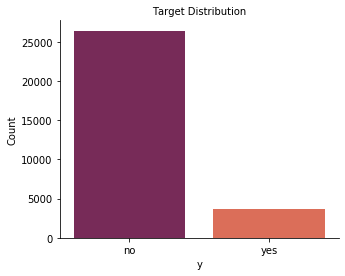

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 4)
sns.countplot(x = 'y', data = bank, palette='rocket')
ax.set_xlabel('y', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('Target Distribution', fontsize=10)
sns.despine()
plt.savefig('Target Distribution.png')

1. Target tidak seimbang. Jumlah bank clients yang tidak subscribe jauh lebih banyak dari yang subscribe.

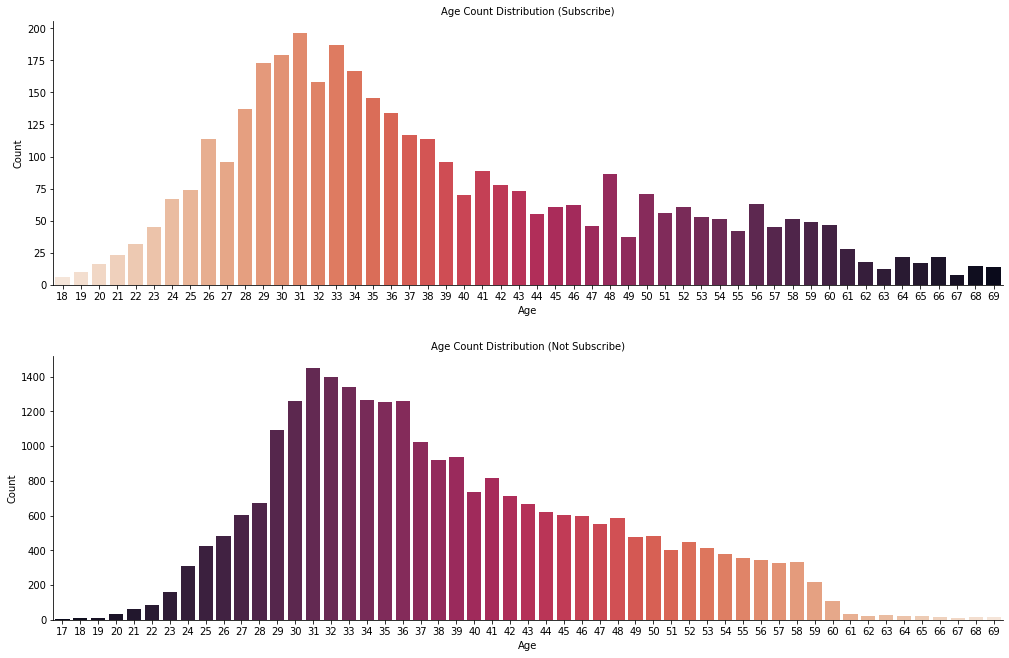

In [10]:
# Figures
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (15,25))
fig.set_size_inches(15, 10)
fig.tight_layout(pad=5.0)

# Table 1
sns.countplot(x = 'age', data = bank2, ax = ax1, palette = 'rocket_r')
ax1.set_xlabel('Age', fontsize=10)
ax1.set_ylabel('Count', fontsize=10)
ax1.set_title('Age Count Distribution (Subscribe)', fontsize=10)

# Table 2
sns.countplot(x = 'age', data = bank1, ax = ax2, palette = 'rocket')
ax2.set_xlabel('Age', fontsize=10)
ax2.set_ylabel('Count', fontsize=10)
ax2.set_title('Age Count Distribution (Not Subscribe)', fontsize=10)

sns.despine()

plt.savefig('Age Count Distribution.png')

1. Jumlah bank clients terbanyak di usia 31.
2. Bank clients yang subscribe mayoritas berasal dari kisaran usia 26-38.
3. Rekomendasi : Membuat strategi marketing dan menyesuaikan benefit yang ditawarkan produk untuk menarik bank clients yang di atas 38 tahun.

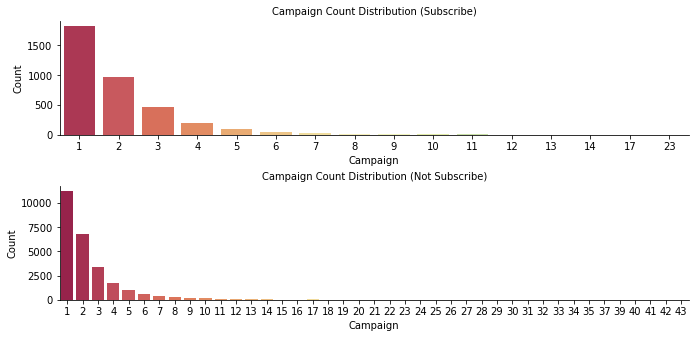

In [11]:
# Figures
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (10,15))
fig.set_size_inches(10, 5)
fig.tight_layout(pad=3.0)

# Table 1
sns.countplot(x = 'campaign', data = bank2, ax = ax1, palette = 'Spectral')
ax1.set_xlabel('Campaign', fontsize=10)
ax1.set_ylabel('Count', fontsize=10)
ax1.set_title('Campaign Count Distribution (Subscribe)', fontsize=10)

# Table 2
sns.countplot(x = 'campaign', data = bank1, ax = ax2, palette = 'Spectral')
ax2.set_xlabel('Campaign', fontsize=10)
ax2.set_ylabel('Count', fontsize=10)
ax2.set_title('Campaign Count Distribution (Not Subscribe)', fontsize=10)

sns.despine()

plt.savefig('Campaign Count Distribution.png')

1. Bank clients yang subscribe paling banyak dihubungi sejumlah dua puluh tiga kali.
2. Bank clients yang tidak subscribe paling banyak dihubungi sejumlah empat puluh tiga kali.

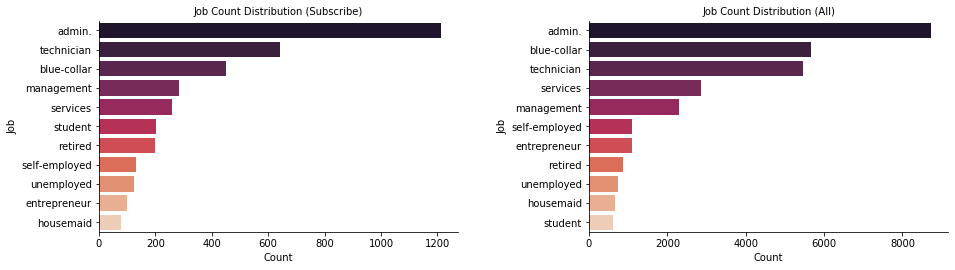

In [12]:
# Figures
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (40,6))
fig.set_size_inches(15,6)
fig.tight_layout(pad=10.0)

# Table 1
sns.countplot(y = 'job', data = bank2, ax= ax1, palette = 'rocket', order = bank2['job'].value_counts().index)
ax1.set_ylabel('Job', fontsize=10)
ax1.set_xlabel('Count', fontsize=10)
ax1.set_title('Job Count Distribution (Subscribe)', fontsize=10)

# Table 2
sns.countplot(y = 'job', data = bank, ax = ax2, palette = 'rocket', order = bank['job'].value_counts().index)
ax2.set_ylabel('Job', fontsize=10)
ax2.set_xlabel('Count', fontsize=10)
ax2.set_title('Job Count Distribution (All)', fontsize=10)

sns.despine()

plt.savefig('Job Count Distribution.png')

1. Bank clients paling banyak memiliki pekerjaan di bidang admin dan paling sedikit pelajar.
2. Bank clients yang susbcribe paling sedikit yang bekerja sebagai housemaid.
3. Rekomendasi : Melakukan inovasi pada produk menyesuaikan dengan kebutuhan konsumen sehingga dapat menarik bank clients dari tipe pekerjaan yang self-employed, unemployed, entrepreneur dan housemaid.

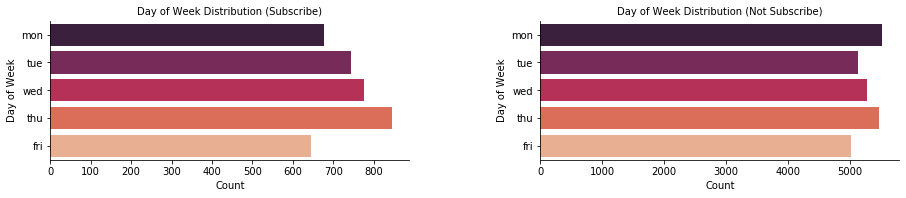

In [13]:
# Figures
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (40,6))
fig.set_size_inches(15,5)
fig.tight_layout(pad=10.0)

# Table 1
sns.countplot(y = 'day_of_week', data = bank2, ax = ax1, palette = 'rocket')
ax1.set_ylabel('Day of Week', fontsize=10)
ax1.set_xlabel('Count', fontsize=10)
ax1.set_title('Day of Week Distribution (Subscribe)', fontsize=10)

# Table 2
sns.countplot(y = 'day_of_week', data = bank1, ax = ax2, palette = 'rocket')
ax2.set_ylabel('Day of Week', fontsize=10)
ax2.set_xlabel('Count', fontsize=10)
ax2.set_title('Day of Week Distribution (Not Subscribe)', fontsize=10)

sns.despine()

plt.savefig('Day of Week Count Distribution.png')

1. Bank clients paling sedikit dihubungi di hari Jumat.
2. Bank clients yang subscribe paling banyak dihubungi di hari Kamis.
3. Bank clients tidak susbcribe paling banyak dihubungi di hari Senin.
4. Bank clients yang subscribe memiliki kenaikan jumlah dari hari Senin hingga Kamis namun turun di Jumat.
5. Bank clients yang tidak subscribe memiliki penurunan jumlah dari hari Senin ke Selasa dan Kamis ke Jumat.

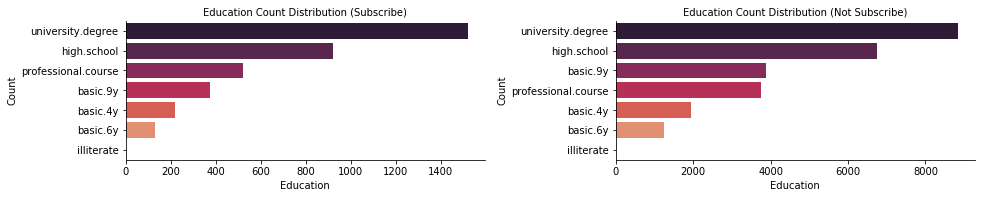

In [14]:
# Figures
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (40,6))
fig.set_size_inches(15, 5)
fig.tight_layout(pad=10.0)

# Table 1
sns.countplot(y = 'education', data = bank2, ax = ax1, palette = 'rocket',  order = bank2['education'].value_counts().index)
ax1.set_xlabel('Education', fontsize=10)
ax1.set_ylabel('Count', fontsize=10)
ax1.set_title('Education Count Distribution (Subscribe)', fontsize=10)
ax1.tick_params(axis='y')

# Table 2
sns.countplot(y = 'education', data = bank1, ax = ax2, palette = 'rocket', order = bank1['education'].value_counts().index)
ax2.set_xlabel('Education', fontsize=10)
ax2.set_ylabel('Count', fontsize=10)
ax2.set_title('Education Count Distribution (Not Subscribe)', fontsize=10)
ax2.tick_params(axis='y')

sns.despine()

plt.savefig('Education Count Distribution.png')

1. Bank clients paling banyak merupakan lulusan universitas.
2. Bank clients paling sedikit merupakan illiterate.
3. Bank clients yang subscribe lebih banyak yang lulusan professional course dibanding lulusan basic.9y.

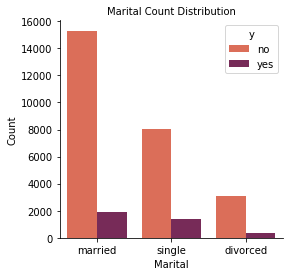

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(4, 4)
sns.countplot(x = 'marital', hue = 'y', data = bank, palette = 'rocket_r')
ax.set_xlabel('Marital', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('Marital Count Distribution', fontsize=10)
sns.despine()
plt.savefig('Marital Count Distribution.png')

1. Bank clients paling banyak yang statusnya married.
2. Bank clients paling sedikit yang statusnya divorced.

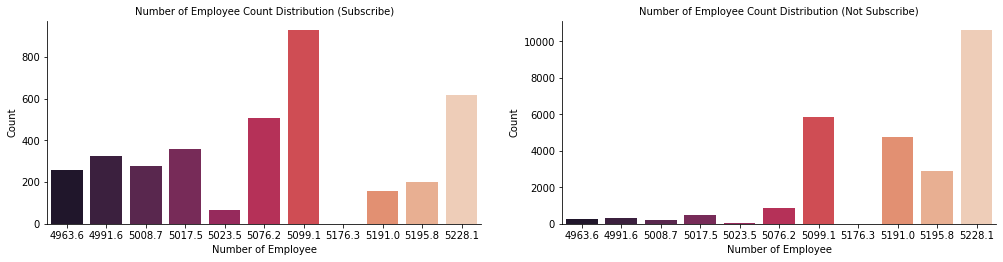

In [16]:
# Figures
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (35,4.5))
fig.set_size_inches(15, 4.5)
fig.tight_layout(pad=5.0)

# Table 1
sns.countplot(x = 'nr.employed', data = bank2, ax = ax1, palette = 'rocket')
ax1.set_xlabel('Number of Employee', fontsize=10)
ax1.set_ylabel('Count', fontsize=10)
ax1.set_title('Number of Employee Count Distribution (Subscribe)', fontsize=10)

# Table 2
sns.countplot(x = 'nr.employed', data = bank1, ax = ax2, palette = 'rocket')
ax2.set_xlabel('Number of Employee', fontsize=10)
ax2.set_ylabel('Count', fontsize=10)
ax2.set_title('Number of Employee Count Distribution (Not Subscribe)', fontsize=10)

sns.despine()

plt.savefig('Number of Employee Count Distribution.png')

1. Bank clients paling sedikit ketika jumlah employee 5176.
2. Bank clients yang subscribe paling banyak ketika jumlah employee 5099.
3. Bank clients yang tidak subscribe paling banyak ketika jumlah employee 5228. 

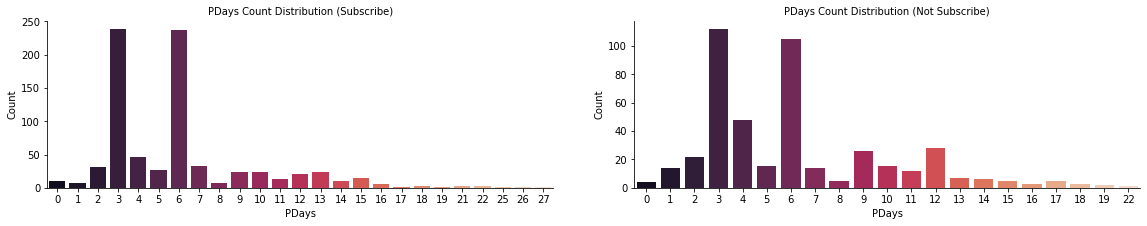

In [17]:
# Figures
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (39,4))
fig.set_size_inches(17, 4)
fig.tight_layout(pad=5.0)

# Table 1
sns.countplot(x = 'pdays', data = bank5, ax = ax1, palette = 'rocket')
ax1.set_xlabel('PDays', fontsize=10)
ax1.set_ylabel('Count', fontsize=10)
ax1.set_title('PDays Count Distribution (Subscribe)', fontsize=10)

# Table 2
sns.countplot(x = 'pdays', data = bank4, ax = ax2, palette = 'rocket')
ax2.set_xlabel('PDays', fontsize=10)
ax2.set_ylabel('Count', fontsize=10)
ax2.set_title('PDays Count Distribution (Not Subscribe)', fontsize=10)

sns.despine()

plt.savefig('PDays Count Distribution.png')

1. Bank clients yang paling banyak yang terakhir dihubungi 3 hari sebelumnya.
2. Bank clients yang subscribe terakhir dihubungi paling lama 27 hari sebelumnya.
3. Bank clients yang tidak subscribe terakhir dihubungi paling lama 22 hari sebelumnya.

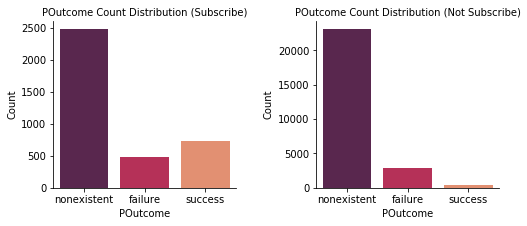

In [18]:
# Figures
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (8,13))
fig.set_size_inches(8, 4)
fig.tight_layout(pad=5.0)

# Table 1
sns.countplot(x = 'poutcome', data = bank2, ax = ax1, palette = 'rocket')
ax1.set_xlabel('POutcome', fontsize=10)
ax1.set_ylabel('Count', fontsize=10)
ax1.set_title('POutcome Count Distribution (Subscribe)', fontsize=10)

# Table 2
sns.countplot(x = 'poutcome', data = bank1, ax = ax2, palette = 'rocket')
ax2.set_xlabel('POutcome', fontsize=10)
ax2.set_ylabel('Count', fontsize=10)
ax2.set_title('POutcome Count Distribution (Not Subscribe)', fontsize=10)

sns.despine()

plt.savefig('POutcome Count Distribution.png')

1. Bank clients yang subscribe lebih banyak yang di campaign sebelumnya berhasil daripada yang gagal.
2. Bank clients yang tidak subscribe lebih banyak yang di campaign sebelumnya gagal.

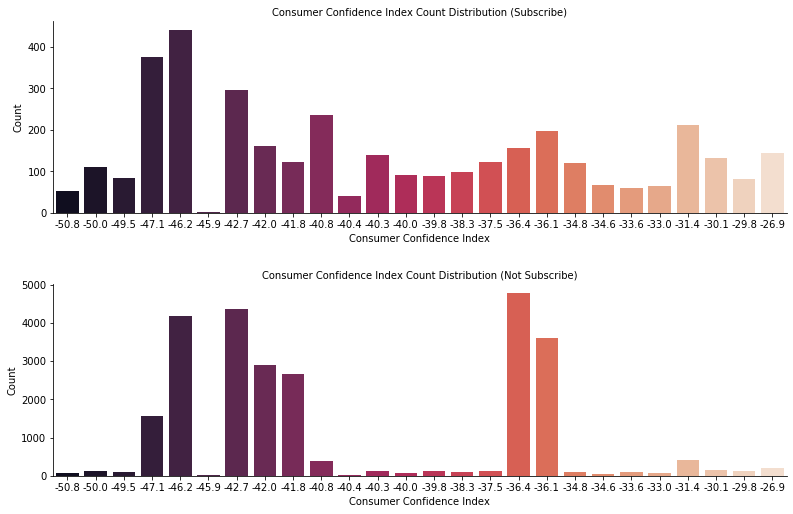

In [19]:
# Figures
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (12,21))
fig.set_size_inches(12, 8)
fig.tight_layout(pad=5.0)

# Table 1
sns.countplot(x = 'cons.conf.idx', data = bank2, ax = ax1, palette = 'rocket')
ax1.set_xlabel('Consumer Confidence Index', fontsize=10)
ax1.set_ylabel('Count', fontsize=10)
ax1.set_title('Consumer Confidence Index Count Distribution (Subscribe)', fontsize=10)

# Table 2
sns.countplot(x = 'cons.conf.idx', data = bank1, ax = ax2, palette = 'rocket')
ax2.set_xlabel('Consumer Confidence Index', fontsize=10)
ax2.set_ylabel('Count', fontsize=10)
ax2.set_title('Consumer Confidence Index Count Distribution (Not Subscribe)', fontsize=10)

sns.despine()

plt.savefig('Consumer Confidence Index Count Distribution.png')

1. Bank clients paling sedikit saat Consumer Confidence Indexnya -45.9.
2. Bank clients yang subscribe paling banyak saat Consumer Confidence Indexnya -46.2.
3. Bank clients yang tidak subscribe paling banyak saat Consumer Confidence Indexnya -36.4.